# Sentimental Analysis: Airbnb Reviews 
##### Problematique : Are the customers feeling more negative or more positive toward the experience on Airbnb after COVID-19 outbreak?

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

The dataset is from Inside Airbnb.  

'reviews.csv' : the raw review dataset downloaded from Inside Airbnb
- this dataset was compiled on 11 September, 2020
- include reviews from 2009 to Septemer 2020


In [21]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
3,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
4,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...


In [22]:
print(reviews.shape)

(1308133, 6)


------

# Data Cleaning & Preprocessing before modeling
The cleaned and preprocessed dataset will be saved in to two files (to save time)
- separate 2020 and 2019(for comparison) reviews
- detect the language of the reviews (assign to 'lang' column)
- save one file for 2020 cleaned reviews and one file for 2019 cleaned reviews(for comparison)


## 2020 cleaned reviews
Keep only 2020 reviews

In [24]:
reviews_2020_raw = reviews.loc[reviews["date"]>"2019-12-31"]

### Detect reviews language with stop words
- lowercase the reviews
- tokenize the reviews
- detect language with stop words

In [ ]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

### Assign 'lang' column to the raw dataset
### !!! the section below is long to run

In [ ]:
reviews_2020_raw['lang']= reviews_2020_raw['comments'].apply( lambda x : get_language(str(x)))
reviews_2020 = reviews_2020_raw

In [ ]:
reviews_2020.head()

### Save files for sentimental analysis : 2020
'reviews2020-lang.csv' : the dataset was already cleaned before (too long to run)  
- contains only reviews from 2020
- include the column which contains the languange detected in the review

In [11]:
reviews_2020.to_csv('reviews2020-lang.csv')

------

## 2019 cleaned reviews
Keep only 2019 reviews

In [ ]:
reviews_2019-raw = reviews.loc[(reviews["date"]<"2020-01-01") & (reviews['date']>'2018-12-31')]

### Assign 'lang' column to the raw dataset

### !!! the section below is long to run

In [10]:
reviews_2019-raw['lang']= reviews_2019['comments'].apply( lambda x : get_language(str(x)))
reviews_2019 = reviews_2019-raw

/Users/IvoryDaae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
reviews_2019.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
9,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état..."
34,4886,449338572,2019-05-06,58024752,Krista,The host canceled this reservation 7 days befo...
208,5396,366234904,2019-01-02,75832568,Jody,We just spent Christmas and New Years at Borzo...
209,5396,367249568,2019-01-04,14061850,Ilaria,Amazing location! The island is so cute and it...


### Save files for sentimental analysis : 2019
'reviews2019-lang.csv' : the dataset was already cleaned before (too long to run)  
- contains only reviews from 2019
- include the column which contains the languange detected in the review

In [11]:
reviews_2019.to_csv('reviews2019-lang.csv')

-----
----

## Cleaned datasets

'reviews2020-lang.csv' : the dataset was already cleaned before (too long to run)  
- contains only reviews from 2020
- include the column which contains the languange detected in the review

'reviews2019-lang.csv' : the dataset was already cleaned before (too long to run)  
- contains only reviews from 2019
- include the column which contains the languange detected in the review

# Sentimental Analysis on reviews in 2020

In [12]:
# ------ Load the data ------
reviews_2020 = pd.read_csv('reviews2020-lang.csv')

# ------ Keep only useful coliumns the data ------
reviews_2020 = reviews_2020[['listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'lang']]

In [15]:
# ------ preview the data ------
reviews_2020.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,5396,588263108,2020-01-04,138392009,Patricia,..,arabic
1,5396,589499566,2020-01-06,28821240,Adrien,"Awesome, safe building, clean room, but more i...",english
2,5396,607910128,2020-02-19,26509433,Roberto,Great location and very helpful host.,english
3,5396,611549316,2020-02-27,8898065,Brenda,Location location location! This flat is perfe...,english
4,5396,612203113,2020-02-29,46597362,Carolyn,Great location. We were a bit bummed the wifi ...,english


In [19]:
# ------ shape of dataset ------
reviews_2020.shape

(124357, 7)

In [17]:
# ------ counts of the language in the dataset ------
reviews_2020['lang'].value_counts()

english        52861
french         44684
arabic         11041
spanish         4014
azerbaijani     3463
german          2207
dutch           1723
italian         1404
portuguese      1088
russian          757
danish           740
slovene           98
romanian          79
hungarian         77
swedish           25
greek             23
indonesian        23
norwegian         21
turkish           20
finnish            8
kazakh             1
Name: lang, dtype: int64

## Preprossesing: 

1. drop empty reviews
2. drop non english reviews 
3. drop autogenerated reviews


In [94]:
# ------ drop empty reviews ------
reviews_2020 = reviews_2020.dropna(subset=["comments"])

In [95]:
# ------ drop non english reviews ------
reviews_2020 = reviews_2020.loc[reviews_2020['lang']=='english']

In [96]:
# ------ check if its automatic post ------

def check_auto(input_text):
    if "This is an automated posting" in str(input_text):
        return 1
    else:
        return 0

In [97]:
# ------ drop autogenerated reviews ------
reviews_2020['auto']=reviews_2020['comments'].apply(lambda x: check_auto(x))
reviews_2020 = reviews_2020.loc[reviews_2020['auto']==0]
reviews_2020 = reviews_2020 [['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'lang']]

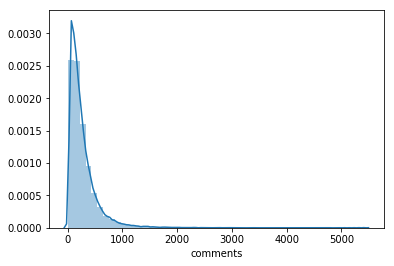

In [98]:
# ------ cleaned reviews length distribution ------
sns.distplot(reviews_2020["comments"].str.len())

In [99]:
# ------ cleaned dataset shape ------
reviews_2020.shape

(51207, 7)

## Vader sentimental analysis
Since the dataset is not labeled, we will use VADER model to add two columns in the dataset:
* sentiment: positive or negative  (decided by the compound score given by the model)
* score: the VADER compound score 

In [100]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [101]:
# ------ import VADER and print some examples ------

sid = SentimentIntensityAnalyzer()
for sentence in reviews_2020['comments'].values[:3]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print('()')

Awesome, safe building, clean room, but more importantly, right in the CENTER of Paris, on the island, quick walk to the big central RER/subway exchange (Châtelet), I was pleasantly surprised. The photo makes it look bigger than it is but this is standard practice - it's an excellent room for 2.
compound: 0.9652, 
neg: 0.0, 
neu: 0.664, 
pos: 0.336, 
()
Great location and very helpful host. 
compound: 0.8016, 
neg: 0.0, 
neu: 0.357, 
pos: 0.643, 
()
Location location location! This flat is perfectly located. We were able to walk to pretty much everything and/or access the train very easily from its location. It a safe area, we have family in Paris that confirmed this as well. 

The flat itself is nice. Very modern. The bed for being a pull out coach is actually comfortable. I will say that the stair case to get to the flat are wooden almost spiral like stair case, if you have a lot of luggage they are not the  most friendly so please keep that in mind. Its pretty hazardous! There is no

In [102]:
# ------ add score column ------
reviews_2020['score'] = reviews_2020['comments'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [103]:
# ------ generate the label by score ------

def compound_to_label(score):
    if score < 0:
        return "neg"
    else:
        return "pos"

In [104]:
# ------ add label column ------
reviews_2020['label']= reviews_2020['score'].apply(compound_to_label)

In [105]:
reviews_2020.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,score,label
1,5396,589499566,2020-01-06,28821240,Adrien,"Awesome, safe building, clean room, but more i...",english,0.9652,pos
2,5396,607910128,2020-02-19,26509433,Roberto,Great location and very helpful host.,english,0.8016,pos
3,5396,611549316,2020-02-27,8898065,Brenda,Location location location! This flat is perfe...,english,0.9908,pos
4,5396,612203113,2020-02-29,46597362,Carolyn,Great location. We were a bit bummed the wifi ...,english,0.8917,pos
6,5396,614805142,2020-03-06,269002087,Lilla,This appartment is very nice and clean. It's r...,english,0.9711,pos


In [106]:
# ------ count labels ------
reviews_2020['label'].value_counts()

pos    49808
neg     1399
Name: label, dtype: int64

In [107]:
# ------ labels percentage in the dataset ------
reviews_2020['label'].value_counts()/len(reviews_2020['label'])

pos    0.97268
neg    0.02732
Name: label, dtype: float64

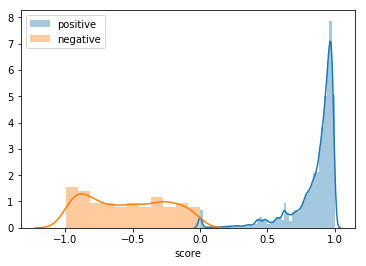

In [108]:
# ------ plot the distribution of the scores for positive and negative reviews  ------
sns.distplot(reviews_2020.loc[reviews_2020['label']=='pos', 'score'])
sns.distplot(reviews_2020.loc[reviews_2020['label']=='neg', 'score']);
plt.legend(labels=['positive', 'negative'])

### Examples of Positive and Negative Reviews

In [61]:
# ------ Print the most positive reviews  ------

posi = reviews_2020.loc[reviews_2020['label']=='pos'][['comments','score']].sort_values('score',ascending=False)
i=0
for element in posi['comments']:
    i = i++1
    if i < 3:
        print(i)
        print(element)
        print("-------")

1
AMAZING PLACE & So Much More!!

The Paris flat on it own is very nice, clean, in a great location, with a very responsive and accomidable host; but that pales in comparison to to the kindness and extra effort and care that the host provides to guests. 

The flat feels like a home from the minute that walk in. I was traveling from the US with my wife and 3 small children through Paris as part of a greater European adventure. The host, Harout, had excellent communication with us leading up to our arrival. He then met us onsite to show us in, show us around (not only the apartment but the building as well), and helped us settle in and showed us where everything was and how everything worked. He provided directions to local attractions and transportation options and answered any and all questions that we had. He was not in a rush, it was clear that he was going to stay as long as needed until we felt absolutely comfortable in our new surroundings. The flat itself looks exactly like the p

In [62]:
# ------ postive reviews and score  ------
posi.head()

,comments,score
36462,AMAZING PLACE & So Much More!!\n\nThe Paris fl...,0.9996
858,A brief summary for those who won't take the t...,0.9994
16122,Check in: \nThere was a slight inconvenience d...,0.9992
6342,I fell in love with the apartment from the ver...,0.9992
101271,"I was thinking I am a good host, but Alix is t...",0.9992


In [63]:
# ------ mean score of positive reviews ------

reviews_2020.loc[reviews_2020['label']=='pos']['score'].mean()

0.8472871044812053

In [66]:
# ------ mean score of negative reviews ------
reviews_2020.loc[reviews_2020['label']=='neg']['score'].mean()

-0.5461503931379562

### Word Cloud of Positive and Negative Reviews

In [72]:
import re
from collections import Counter

# ------ stop words from nltk ------
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words("english"))

In [71]:
# import and use wordcloud
from wordcloud import WordCloud

### WordCloud: Positive

In [73]:
# ------ cleaned the stop words ------
pos = reviews_2020.loc[reviews_2020['label']=='pos']['comments']
pattern = "[A-Za-zÀ-ÿ0-9]+(?:'[st])?"

pos_c = Counter()
pos.apply(lambda x: pos_c.update(re.findall(pattern, x.lower())))

for stop in stopwords_en:
    del pos_c[stop]

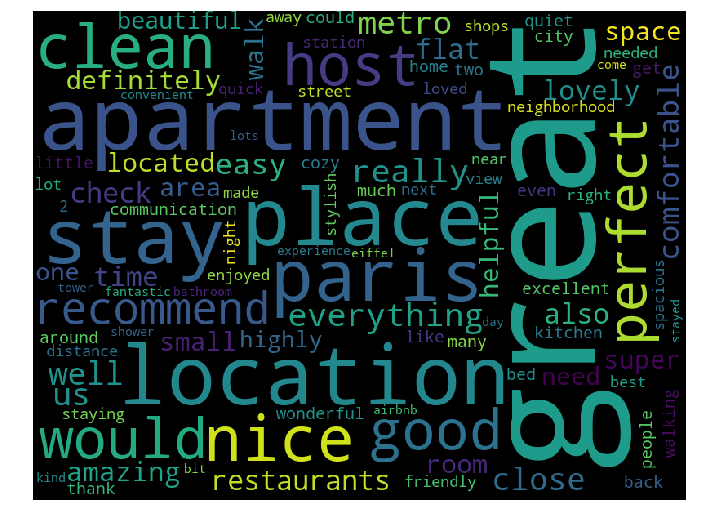

In [74]:
# ------ generate wordcloud ------
wc = WordCloud(max_words=100, stopwords=stopwords_en, normalize_plurals=True, width=800, height=600)
wc.generate_from_frequencies(pos_c)

# display de word cloud
plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(wc);

### Wordcloud: Negative

In [77]:
# ------ cleaned the stop words ------
neg = reviews_2020.loc[reviews_2020['label']=='neg']['comments']
# get all words
pattern = "[A-Za-zÀ-ÿ0-9]+(?:'[st])?"

neg_c = Counter()
neg.apply(lambda x: neg_c.update(re.findall(pattern, x.lower())))

for stop in stopwords_en:
    del neg_c[stop]

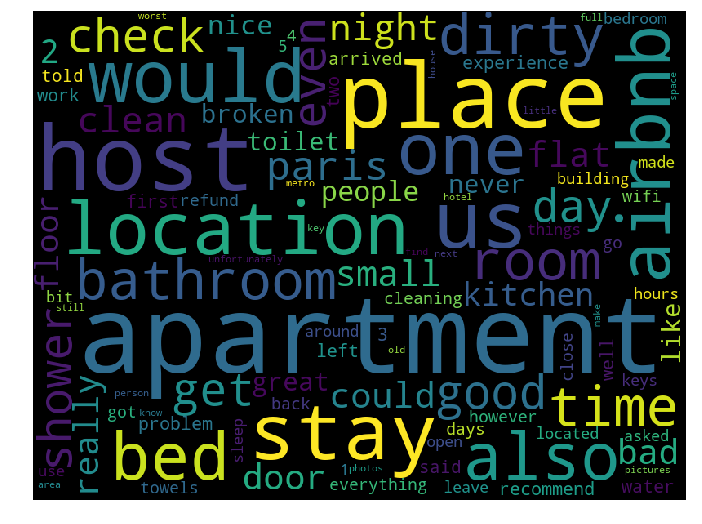

In [80]:
# ------ generate wordcloud ------
wc = WordCloud(max_words=100, stopwords=stopwords_en, normalize_plurals=True, width=800, height=600)
wc.generate_from_frequencies(neg_c)

# display de word cloud
plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(wc);

## Sentiment Polarity
1. The distribution of 4 VADER scores: Neutrality, Positivity, Negativity, Compound

In [81]:
# ------ create a list containing each review  ------
reviews_f = [r for r in reviews_2020['comments']]

In [82]:
# ------ get the score from VADER ------
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

In [83]:
import pylab as pl
from pandas import *

Text(0.5,1,'Neutrality')

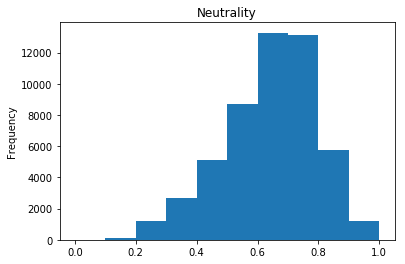

In [84]:
# ------ Plot neutrality score distribuiton ------
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')
pl.title("Neutrality")

Text(0.5,1,'Positivity')

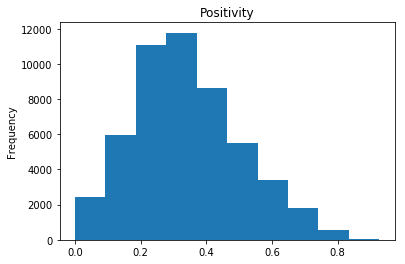

In [85]:
# ------ Plot Positivity score distribuiton ------
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')
pl.title("Positivity")

Text(0.5,1,'Negativity')

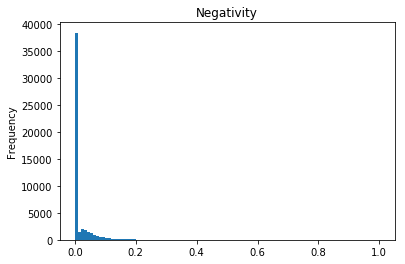

In [86]:
# ------ Plot Negativity score distribuiton ------
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)
pl.title("Negativity")

Text(0.5,1,'Compound')

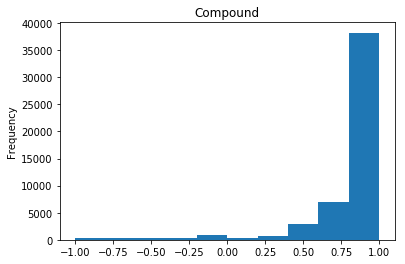

In [87]:
# ------ Plot Compound score distribuiton ------
pd.Series([score['compound'] for score in pscores]).plot(kind='hist')
pl.title("Compound")

### Save the data for Topic Modeling 
"reviews2020-label.csv":
* only contains reviews in 2020
* dataset cleaned (drop empty reviews, drop non-english reviews, drop automatic posts)
* labelled and scored by VADER model ---> 'label' & 'score' columns

-----

# Comparison : Sentimental Analysis on reviews in 2019

In [4]:
# ------ Load the data ------
reviews_19 = pd.read_csv('reviews2019-lang.csv')

# ------ Keep only useful coliumns the data ------
reviews_19 = reviews_19[['listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'lang']]

In [5]:
# ------ preview the data ------
reviews_19.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...,french
1,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état...",french
2,4886,449338572,2019-05-06,58024752,Krista,The host canceled this reservation 7 days befo...,english
3,5396,366234904,2019-01-02,75832568,Jody,We just spent Christmas and New Years at Borzo...,english
4,5396,367249568,2019-01-04,14061850,Ilaria,Amazing location! The island is so cute and it...,english


In [6]:
# ------ shape of dataset ------
reviews_19.shape

(405786, 7)

In [7]:
# ------ counts of the language in the dataset ------
reviews_19['lang'].value_counts()

english        241555
french          87660
arabic          27423
spanish         16473
azerbaijani      7202
german           6537
italian          4782
portuguese       4410
russian          3363
dutch            3170
danish           1965
hungarian         287
slovene           259
swedish           173
romanian          143
norwegian         136
greek              75
indonesian         72
turkish            54
finnish            47
Name: lang, dtype: int64

## Preprossesing: 

1. drop empty reviews
2. drop non english reviews 
3. drop autogenerated reviews


In [47]:
# ------ drop empty reviews ------
reviews_19 = reviews_19.dropna(subset=["comments"])

In [60]:
# ------ drop non english reviews ------
# reviews_19 = reviews_19.loc[(reviews_19['lang'] == 'english') | (reviews_19['lang'] ==  'french')]
reviews_19 = reviews_19.loc[(reviews_19['lang'] == 'english')]

In [49]:
# ------ check if its automatic post ------

def check_auto(input_text):
    if "This is an automated posting" in str(input_text):
        return 1
    else:
        return 0

In [50]:
# ------ drop autogenerated reviews ------
reviews_19['auto']=reviews_19['comments'].apply(lambda x: check_auto(x))
reviews_19 = reviews_19.loc[reviews_19['auto']==0]
reviews_19 = reviews_19 [['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'lang']]

In [53]:
# replace character encoding mistakes
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¡', 'á'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã ', 'à'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã ', 'à'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¢', 'â'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã\xa0', 'à'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¥', 'å'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã£', 'ã'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã»', 'â'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã§', 'ç'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã©', 'é'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¨', 'è'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã«', 'ë'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ãª', 'ê'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¯', 'ï'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã®', 'î'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¬', 'ì'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã\xad', 'í'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã±', 'ñ'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã³', 'ó'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã²', 'ò'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¶', 'ö'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã´', 'ô'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ãµ', 'õ'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã°', 'ð'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¸', 'ø'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ãº', 'ú'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¹', 'ù'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¼', 'ü'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã½', 'ý'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¿', 'ÿ'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã?', 'Æ'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Ã¦', 'æ'))
reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('Â', ''))
# br
reviews_19['comments'] = reviews_19['comments'] = reviews_19['comments'].apply(lambda x: x.replace('<br />', ' '))

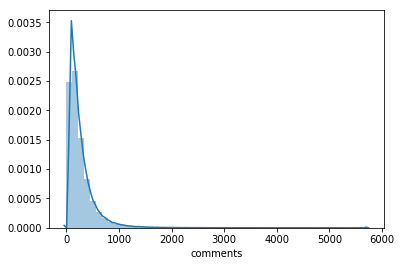

In [54]:
# ------ cleaned reviews length distribution ------
sns.distplot(reviews_19["comments"].str.len())

In [62]:
# ------ cleaned dataset shape ------
reviews_19.shape

(235265, 7)

## Vader sentimental analysis
Since the dataset is not labeled, we will use VADER model to add two columns in the dataset:
* sentiment: positive or negative  (decided by the compound score given by the model)
* score: the VADER compound score 

In [63]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [64]:
# ------ import VADER and print some examples ------

sid = SentimentIntensityAnalyzer()
for sentence in reviews_19['comments'].values[:3]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print('()')

We just spent Christmas and New Years at Borzou's place. It was magical. The space was perfect for what we needed. The location was superb! We made friends with the local grocer, enjoyed way too many cookies from the cookie shop down the the street, and had fresh made croissants every morning. It was a dream! Highly recommend this location!
compound: 0.9689, 
neg: 0.0, 
neu: 0.701, 
pos: 0.299, 
()
Amazing location! The island is so cute and it has everything. Walking distance from Notre Dame and from so many other central areas. I really loved staying in the neighborhood and I highly suggest it to everyone.
About the place: the place is nice for couples or for a single person visiting Paris. Easy communication with the manager, whom is also super helpful and clear. That’s so important! 
Main issue is the bed which is either old or broken, definitely not comfortable. 
There is no coffee machine at home, the kitchen light was broken, and so was the heater in the bathroom, but the place 

In [65]:
# ------ add score column ------
reviews_19['score'] = reviews_19['comments'].apply(lambda x: sid.polarity_scores(x)['compound'])

/Users/IvoryDaae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
# ------ generate the label by score ------

def compound_to_label(score):
    if score < 0:
        return "neg"
    else:
        return "pos"

In [67]:
# ------ add label column ------
reviews_19['label']= reviews_19['score'].apply(compound_to_label)

/Users/IvoryDaae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
reviews_19

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,score,label
3,5396,366234904,2019-01-02,75832568,Jody,We just spent Christmas and New Years at Borzo...,english,0.9689,pos
4,5396,367249568,2019-01-04,14061850,Ilaria,Amazing location! The island is so cute and it...,english,0.9312,pos
5,5396,369320547,2019-01-10,212515012,혜인,This room is good to cook.,english,0.4404,pos
6,5396,403009106,2019-01-20,76609105,Arnelle,LOVELY flat! Located in central Paris at the m...,english,0.9438,pos
7,5396,405468878,2019-01-27,38284243,Liz,Borzou’s place is in a perfect location and al...,english,0.7935,pos
...,...,...,...,...,...,...,...,...,...
405750,40941987,584509802,2019-12-30,9314747,Omar,Highly recommend this place. In the heart of t...,english,0.7574,pos
405763,41006225,583109271,2019-12-28,10580422,Septa,Camille is a wonderful personne ! very good ex...,english,0.9711,pos
405764,41007772,583073400,2019-12-28,172356424,Jesus,"an amazing place, with all the services... we ...",english,0.5859,pos
405765,41015657,582013431,2019-12-26,13943277,Mohamad,"Before I reserved, I mentioned to the host tha...",english,0.2778,pos


In [70]:
# ------ import VADER and print some examples ------

sid = SentimentIntensityAnalyzer()
for sentence in reviews_19.loc[reviews_19['lang']=='french']['comments'] .values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print('()')

In [71]:
# ------ count labels ------
reviews_19['label'].value_counts()

pos    229579
neg      5686
Name: label, dtype: int64

In [72]:
# ------ labels percentage in the dataset ------
reviews_19['label'].value_counts()/len(reviews_19['label'])

pos    0.975832
neg    0.024168
Name: label, dtype: float64

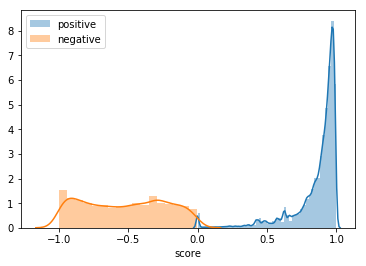

In [73]:
# ------ plot the distribution of the scores for positive and negative reviews  ------
sns.distplot(reviews_19.loc[reviews_19['label']=='pos', 'score'])
sns.distplot(reviews_19.loc[reviews_19['label']=='neg', 'score']);
plt.legend(labels=['positive', 'negative'])

### Examples of Positive and Negative Reviews

In [74]:
# ------ Print the most positive reviews  ------

posi = reviews_19.loc[reviews_19['label']=='pos'][['comments','score']].sort_values('score',ascending=False)
i=0
for element in posi['comments']:
    i = i++1
    if i < 3:
        print(i)
        print(element)
        print("-------")

1
Wow! This is one of the best AirBnBs I’ve ever rented in Paris (or anywhere now that I think about it!) It is a new listing but is filling up fast because it is AWESOME. Most AirBnBs make me think “This place would be perfect if only...”.  This is not the case with Stephan’s “Le Bar à Vin”. It is newly remodeled and all the details both large and small are SO well thought out!!

1. Beautiful “hardwood tile” floors and gorgeous coordinated kitchen/bathroom tile. 
2. A full size refrigerator 
3. A small hidden washer/dryer combo as well as a dishwasher
4. Functional, chic and fully stocked kitchen
5. Comfortable beds
6. Remote control Louvers on the bedroom skylight to keep the room dark in the morning. 
7. USB ports built into the outlets near the bed
8. Super clean, well lit, cheery, bright and beautifully decorated spaces without clutter. 
9. There are no stairs to climb (other than from the downstairs bedroom) because the apartment is on the ground floor. But even though the living

In [92]:
# ------ postive reviews and score  ------
posi.head()

0.8557296133358963

In [76]:
# ------ mean score of positive reviews ------

reviews_19.loc[reviews_19['label']=='pos']['score'].mean()

0.8557296133357667

In [77]:
# ------ mean score of negative reviews ------
reviews_19.loc[reviews_19['label']=='neg']['score'].mean()

-0.525297221245164

### Word Cloud of Positive and Negative Reviews

In [78]:
import re
from collections import Counter

# ------ stop words from nltk ------
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words("english"))

In [79]:
# import and use wordcloud
from wordcloud import WordCloud

### WordCloud: Positive

In [80]:
# ------ cleaned the stop words ------
pos = reviews_19.loc[reviews_19['label']=='pos']['comments']
pattern = "[A-Za-zÀ-ÿ0-9]+(?:'[st])?"

pos_c = Counter()
pos.apply(lambda x: pos_c.update(re.findall(pattern, x.lower())))

for stop in stopwords_en:
    del pos_c[stop]

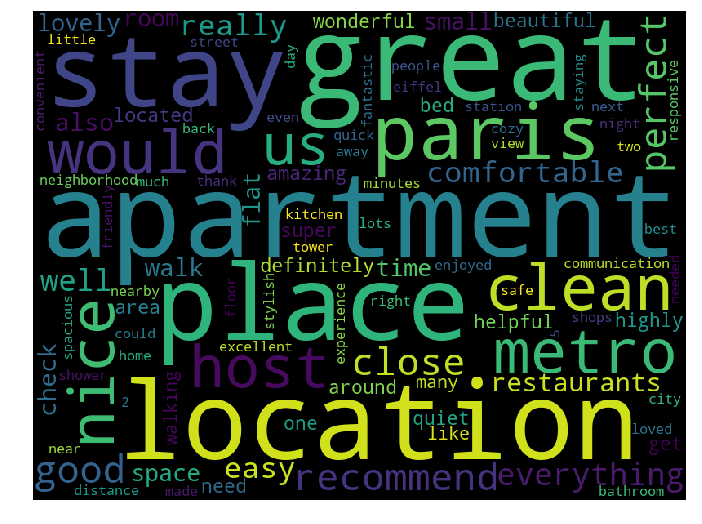

In [81]:
# ------ generate wordcloud ------
wc = WordCloud(max_words=100, stopwords=stopwords_en, normalize_plurals=True, width=800, height=600)
wc.generate_from_frequencies(pos_c)

# display de word cloud
plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(wc);

### Wordcloud: Negative

In [82]:
# ------ cleaned the stop words ------
neg = reviews_19.loc[reviews_19['label']=='neg']['comments']
# get all words
pattern = "[A-Za-zÀ-ÿ0-9]+(?:'[st])?"

neg_c = Counter()
neg.apply(lambda x: neg_c.update(re.findall(pattern, x.lower())))

for stop in stopwords_en:
    del neg_c[stop]

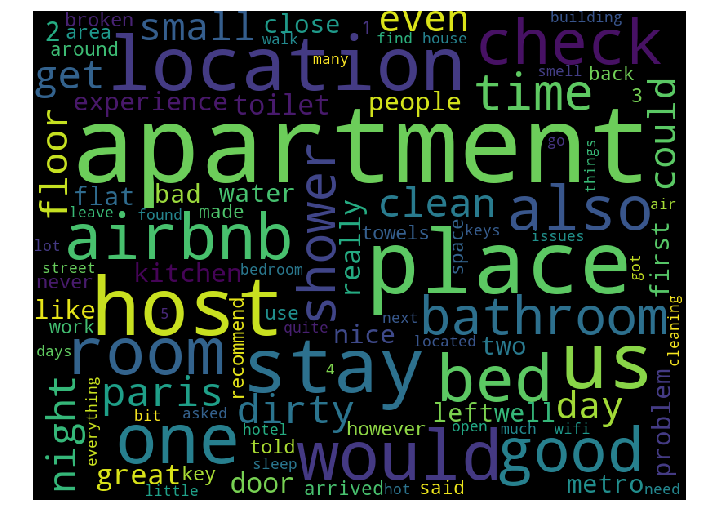

In [83]:
# ------ generate wordcloud ------
wc = WordCloud(max_words=100, stopwords=stopwords_en, normalize_plurals=True, width=800, height=600)
wc.generate_from_frequencies(neg_c)

# display de word cloud
plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(wc);

## Sentiment Polarity
1. The distribution of 4 VADER scores: Neutrality, Positivity, Negativity, Compound

In [84]:
# ------ create a list containing each review  ------
reviews_f = [r for r in reviews_19['comments']]

In [85]:
# ------ get the score from VADER ------
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

In [86]:
import pylab as pl
from pandas import *

Text(0.5,1,'Neutrality')

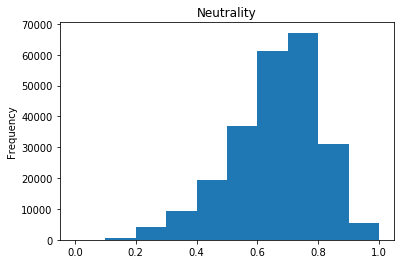

In [87]:
# ------ Plot neutrality score distribuiton ------
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')
pl.title("Neutrality")

Text(0.5,1,'Positivity')

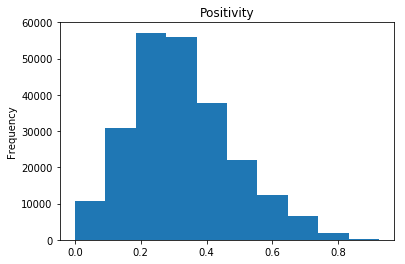

In [88]:
# ------ Plot Positivity score distribuiton ------
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')
pl.title("Positivity")

Text(0.5,1,'Negativity')

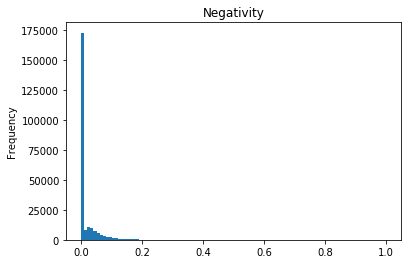

In [89]:
# ------ Plot Negativity score distribuiton ------
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)
pl.title("Negativity")

Text(0.5,1,'Compound')

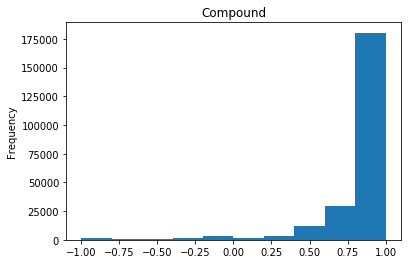

In [90]:
# ------ Plot Compound score distribuiton ------
pd.Series([score['compound'] for score in pscores]).plot(kind='hist')
pl.title("Compound")

-----